# Lecture 30: Chi-Square, Student's t, Multivariate Normal


## Stat 110, Prof. Joe Blitzstein, Harvard University

----

## $\chi^2$ Distribution

The Chi-square Distribution is denoted as $\chi^2(n)$ or sometimes $\chi_{n}^2$, where $n$ indicates the _degrees of freedom_. It used everywhere (I think you used it before in feature analysis). It is related to Normal distribution.

Let $V = Z_1^2 + Z_2^3 + \dots + Z_n^2$, where the $Z_j$ are i.i.d. $\mathcal{N}(0,1)$. Then by definition, $V \sim \chi^2(n)$.

You will find that in a lot of things involving statistics, the sum of squares of $\mathcal{N}(0,1)$ often pops up.

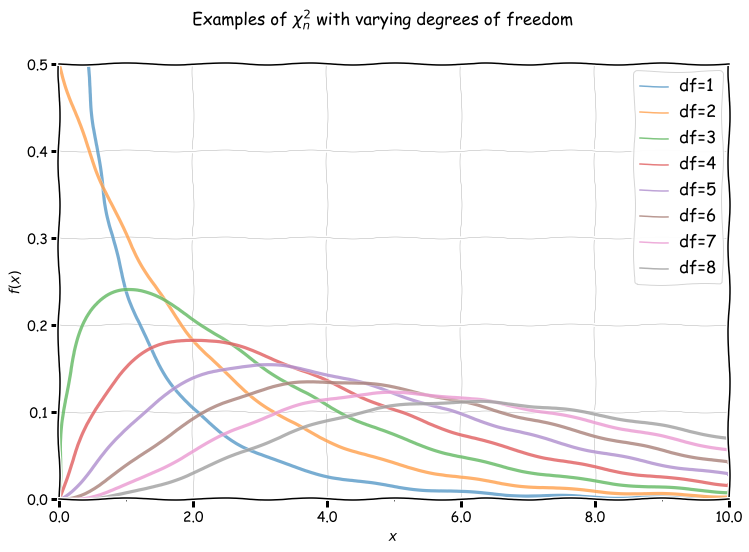

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.stats import chi2

%matplotlib inline  

plt.xkcd()

dof_values = [1,2,3,4,5,6,7,8]
x = np.linspace(0, 10, 1000)

# plot the distributions
_, ax = plt.subplots(figsize=(12,8))

for d in dof_values:
    ax.plot(x, chi2.pdf(x, d), lw=3.2, alpha=0.6, label='df={}'.format(d))
   
# legend styling
legend = ax.legend()
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)

# y-axis
ax.set_ylim([0.0, 0.5])
ax.set_ylabel(r'$f(x)$')

# x-axis
ax.set_xlim([0, 10.0])
ax.set_xlabel(r'$x$')

# x-axis tick formatting
majorLocator = MultipleLocator(2.0)
majorFormatter = FormatStrFormatter('%0.1f')
minorLocator = MultipleLocator(1.0)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)

ax.grid(color='grey', linestyle='-', linewidth=0.3)
    
plt.suptitle(r'Examples of $\chi^2_n$ with varying degrees of freedom')

plt.show()

### Fact: $\chi^2(1)$ is $\operatorname{Gamma}(\frac{1}{2}, \frac{1}{2})$

#### Proof

Let $Y = Z^2$ where $Z \sim \mathcal{N}(0,1)$ and $y \gt 0$.

\begin{align}
    P(Y \le y) &= P(Z^2 \le y) \\
    &= P( -y^{\frac{1}{2}} \le y \le y^{\frac{1}{2}}) \\
    &= \Phi(y^{\frac{1}{2}}) - \Phi(y^{-\frac{1}{2}}) \\
    &= \Phi(y^{\frac{1}{2}}) - \left( 1 - \Phi(y^{\frac{1}{2}}) \right) \\
    &= 2 \, \Phi(y^{\frac{1}{2}}) - 1 \\
    \\
    \Rightarrow f_{Y}(y) &= y^{-\frac{1}{2}} \, \phi(y^{\frac{1}{2}}) \\
    &= \frac{1}{\sqrt{2\pi}} \, y^{-\frac{1}{2}} \, e^{-\frac{y}{2}} \\
    \\
    \operatorname{Gamma}\left(\frac{1}{2}, \frac{1}{2}\right) &= \frac{1}{\Gamma(\frac{1}{2})} \, \left(\frac{y}{2}\right)^{\frac{1}{2}} \, e^{-\frac{y}{2}} \, \frac{1}{y} \\
    &= \frac{1}{\sqrt{\pi}} \, \sqrt{\frac{y}{2}} \, e^{-\frac{y}{2}} \, \frac{1}{y} \\
    &= \frac{1}{\sqrt{2\pi}} \, y^{-\frac{1}{2}} \, e^{-\frac{y}{2}} &\blacksquare \\
\end{align}

Here's a quick graph to illustrate.

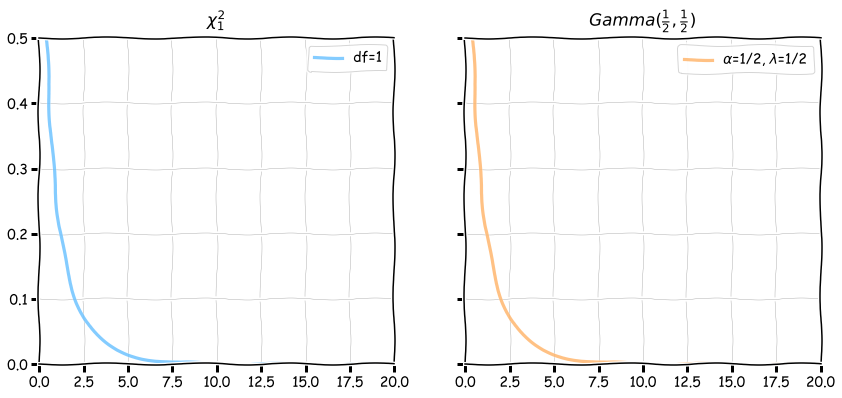

In [2]:
from scipy.stats import gamma

_, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,6))

x = np.linspace(0, 20, 1000)

ax1.plot(x, chi2.pdf(x, 1), lw=3.2, alpha=0.6, color='#33AAFF', label='df=1')
ax1.set_title('$\chi^2_1$', y=1.02)
ax1.set_xlim((0,20.0))
ax1.set_ylim((0,0.5))
ax1.legend()
ax1.grid(color='grey', linestyle='-', linewidth=0.3)

# gamma.pdf API: scale = 1 / beta 
l = 0.5
ax2.plot(x, gamma.pdf(x, 0.5, scale=1/l), lw=3.2, alpha=0.6, color='#FF9933', label=r'$\alpha$=1/2, $\lambda$=1/2')
ax2.set_title(r'$Gamma(\frac{1}{2}, \frac{1}{2})$', y=1.02)
ax2.set_xlim((0,20.0))
ax2.set_ylim((0,0.5))
ax2.legend()
ax2.grid(color='grey', linestyle='-', linewidth=0.3)
None

### Fact:  $\chi^2(n)$ is $\operatorname{Gamma}\left( \frac{n}{2}, \frac{1}{2} \right)$

It follows then that $\chi^2(n) = \operatorname{Gamma}\left( \frac{n}{2}, \frac{1}{2} \right)$

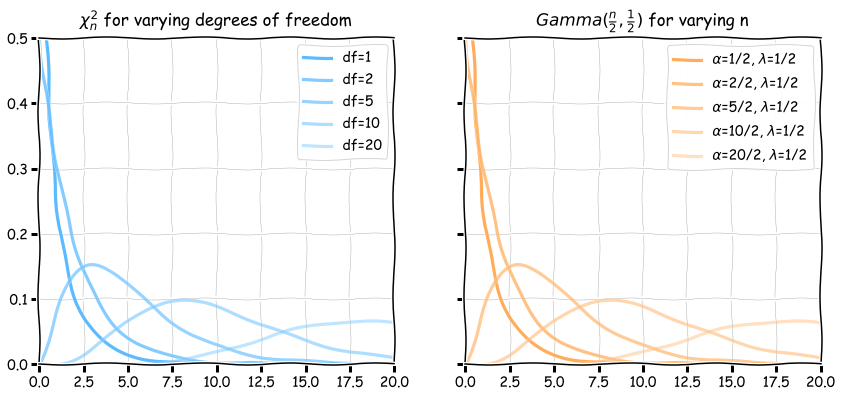

In [3]:
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,6))

x = np.linspace(0, 20, 1000)

dof_values = [1, 2, 5, 10, 20]
col_alph_values = [0.8, 0.6, 0.5, 0.4, 0.3]

for df,c_alph in zip(dof_values, col_alph_values):
    ax1.plot(x, chi2.pdf(x, df), color='#33AAFF', lw=3.2, alpha=c_alph, label='df={}'.format(df))
ax1.set_title('$\chi^2_n$ for varying degrees of freedom', y=1.02)
ax1.set_xlim((0,20.0))
ax1.set_ylim((0,0.5))
ax1.legend()
ax1.grid(color='grey', linestyle='-', linewidth=0.3)

# gamma.pdf API: scale = 1 / lambda
l = 0.5
for alph,c_alph in zip(dof_values, col_alph_values):
    ax2.plot(x, gamma.pdf(x, alph/2, scale=1/l), lw=3.2, alpha=c_alph, color='#FF9933', label=r'$\alpha$={}/2, $\lambda$=1/2'.format(alph))
ax2.set_title(r'$Gamma(\frac{n}{2}, \frac{1}{2})$ for varying n', y=1.02)
ax2.set_xlim((0,20.0))
ax2.set_ylim((0,0.5))
ax2.legend()
ax2.grid(color='grey', linestyle='-', linewidth=0.3)
None

----

## Student's $t$-Distribution

The Student's $t$-distribution can be described in terms of the standard normal $Z \sim N(0,1)$ and $X^2$  $V(n)$ distributions, so that means it can be entirely described in terms of the standard normal distribution.

Let $T = \frac{Z}{\sqrt{V/n}}$, with $Z \sim \mathcal{N}(0,1)$ and $V \sim \chi^2(n)$, where $Z, V$ are independent.

Then we can write $T \sim t_n$, where $n$ is the degrees of freedom.

$t_1$ does not have a $1^{st}$ moment; $t_2$ does not have a $2^{nd}$ moment; $t_3$ does not have a $3^{rd}$ moment; and so on. Odd moments, if they exist, are 0

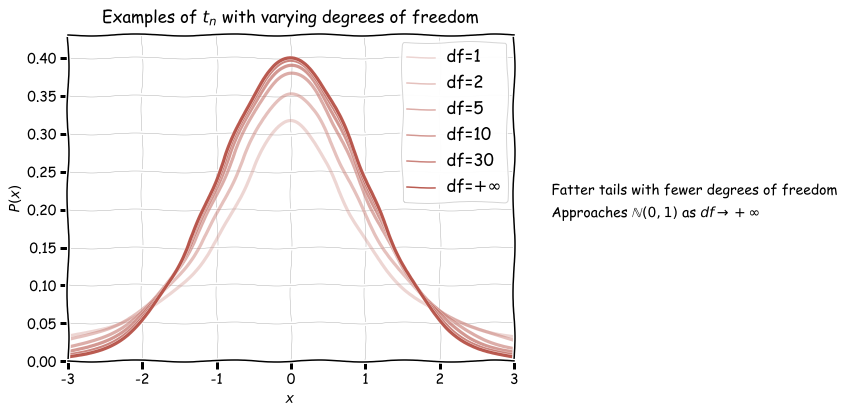

In [4]:
from scipy.stats import t

dof_values   = [1,2,5,10,30,1E10]
col_alph_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8]
x = np.linspace(-5, 5, 1000)

# plot the distributions
fig, ax = plt.subplots(figsize=(8, 6))

for df,c_alph in zip(dof_values, col_alph_values):
    if df > 30:
        dl = r'$+\infty$'
    else:
        dl = df        
    ax.plot(x, t.pdf(x, df), lw=3.2, color='#A93226', alpha=c_alph, label=r'df={}'.format(dl))
   
# legend styling
legend = ax.legend()
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)

# y-axis
ax.set_ylim([0, .43])
ax.set_ylabel(r'$P(x)$')

# x-axis
ax.set_xlim([-3.0, 3.0])
ax.set_xlabel(r'$x$')

ax.grid(color='grey', linestyle='-', linewidth=0.3)
    
plt.title(r'Examples of $t_n$ with varying degrees of freedom', y=1.02)
plt.text(x=3.5, y=0.22, s=r'Fatter tails with fewer degrees of freedom')
plt.text(x=3.5, y=0.19, s=r'Approaches $\mathbb{N}(0,1)$ as $df \rightarrow +\infty$')
plt.show()

### Properties

1. symmetric, i.e., $-T \sim t_n$ <p/>
1. $n=1 \, \Rightarrow $ Cauchy, so $t_1$ does not have a mean<p/>
1. $n \ge 2 \Rightarrow \mathbb{E}(T) = \mathbb{E}(Z)\,\mathbb{E}\left(\frac{1}{\sqrt{V/n}}\right) = 0$ <p/>
1. heavier-tailed than Normal <p/>
1. for $n$ large, $t_n$ looks very much like Normal <p/>

### Brief interlude: even moments of $Z$ and the Gamma distribution

It was proved earlier that for $Z \sim \mathcal{N}(0,1)$, the *even* moments are such that

\begin{align}
  \mathbb{E}(Z^2) &= 1 \\
  \mathbb{E}(Z^4) &= 1 \times 3 = 3 \\
  \mathbb{E}(Z^6) &= 1 \times 3 \times 5 = 15 &\quad \text{ skip factorial} \\
\end{align}

Now, this was proven using moment-generating functions, but we can also relate this to the Gamma distribution.

\begin{align}
  \mathbb{E}(Z^{2n}) &= \mathbb{E}\left( (Z^2)^n \right) \\
  &= \mathbb{E}\left( \chi^2_1 )^n \right) &\text{ but by definition } Z^2 \text{ is } \chi^2_1 \\
  &= \mathbb{E}\left( \operatorname{Gamma}(\frac{1}{2}, \frac{1}{2})^n \right)
\end{align}

... and after this point, we can use our knowledge of the Gamma distribution and LOTUS.

#### Finding $\mathbb{E}(Z^8)$ with $\operatorname{Gamma}(\frac{1}{2}, \frac{1}{2})$

\begin{align}
  \mathbb{E}(Z^8) &= \mathbb{E}\left( (Z^2)^4 \right) \\
  &= \mathbb{E}\left( \operatorname{Gamma}(\frac{1}{2}, \frac{1}{2})^4 \right) \\
  &= \frac{\Gamma(\alpha + 4)}{\Gamma(\alpha) \, \lambda^4} \\
  &= \frac{(\alpha + 3) \, \Gamma(\alpha + 3)}{\Gamma(\alpha) \, \lambda^4} \\
  &= \frac{(\alpha + 3) \, (\alpha + 2) \, \Gamma(\alpha + 2)}{\Gamma(\alpha) \, \lambda^4} \\
  &= \frac{(\alpha + 3) \, (\alpha + 2) \, (\alpha + 1) \, \Gamma(\alpha + 1)}{\Gamma(\alpha) \, \lambda^4} \\
  &= \frac{(\alpha + 3) \, (\alpha + 2) \, (\alpha + 1) \, \alpha \, \Gamma(\alpha)}{\Gamma(\alpha) \, \lambda^4} \\
  &= \frac{\frac{7}{2} \, \frac{5}{2} \, \frac{3}{2} \, \frac{1}{2}}{\frac{1}{2^4}} \\
  &= 1 \times 3 \times 5 \times 7 \\
  &= 105
\end{align}

You can [double-check this answer on WolframAlpha](http://www.wolframalpha.com/input/?i=expected+value+of+Z%5E8).

### Proof of property 5: Student's $t$ when $n$ get large

Let's prove property 5 above, but use the Law of Large Numbers (c.f. Lesson 29).

* Let $T_n = \frac{Z}{\sqrt{V/n}}$ with $Z_1, Z_2, \dots , Z_n$ i.i.d. $\mathcal{N}(0,1)$
* $V = Z_1^2 + Z_2^2 + \dots + Z_n^2$
* $Z$ is independent of the $Z_j^2$

Now we can choose any distribution for this case as long as it is $\mathcal{N}(0,1)$, and so there is nothing wrong in choosing the same distribution $Z$ for the numerator and all elements of the denominator as well.

Then $\frac{V_n}{n} \rightarrow 1$ with probability 1 by the Law of Large Numbers, since the average $\frac{V_n}{n}$ will approach the true average $Z_1^2$ as $n$ gets large. We know that $Z_1^2 = 1$.

Now, the Law of Large Numbers is with regards to point-wise estimates, so we can further state that $\sqrt{\frac{V_n}{n}} \rightarrow 1$ with probability 1.

So $T_n \rightarrow Z$ with probability 1, since the denominator goes to 1 when you have a large number of degrees of freedom; only the $Z$ in the numerator will be of importance.

\begin{align}
\end{align}

----

## Multivariate Normal

### Definition

Random vector $(X_1, X_2, \cdots , X_k) = \vec{X}$ is Multivariate Normal if every linear combination $t_1 X_1 + t_2 X_2 + \cdots + t_k X_k$ is Normal. 


### An example that is multivariate Normal

Let $Z, W$ be i.i.d. $\mathcal{N}(0,1)$. Then $( Z + 2W, 3 \, Z + 5W)$ is multivariate Normal (MVN).

Given constants $s,t$

\begin{align}
  s (Z + 2 \, W) + t (3 \, Z + 5 \, W) &= (s + 3t) Z + (2s + 5t) W \\
\end{align}

But since this is $(s + 3t)$ and $(2s + 5t)$ are just scaling independent Normal random variables $Z$ and $W$ respectively; and since we know that the sum of Normal random variables is also Normal, we know that $(s + 3t) Z + (2s + 5t) W$ is also necessarily a Normal r.v. 

### A non-example (NOT multivariate Normal)

Let $Z \sim \mathcal{N}(0,1)$, and let $S$ be a random sign that is independent of $Z$.

Then $Z,SZ$ are marginally $\mathcal{N}(0,1)$ (consider both individually on their own).

But $(Z, SZ)$ is _not_ multivariate normal! Just test this by considering $(Z + SZ)$. 

$Z + SZ$ cannot be Normal, since:
* half the time, the sum of $Z$ and $SZ$ will be zero when $S$ is negative
* the other times, the sum will be $2Z$
* this is some mixture of discrete and continuous

## MGF of $\vec{X}$

Now with $X \sim \mathcal{N}(\mu, \sigma^2)$, the moment generating function $M(X)$ is

\begin{align}
  M(X) &= \mathbb{E}(e^{tX}) \\
  &= e^{t\mu + \frac{1}{2} \, t^2 \sigma^2} \\\\
\end{align}

Extending this one-dimensional case to the multidimensional $\vec{X}$:

\begin{align}
  M(\vec{X}) &= \mathbb{E}(e^{\vec{t} \, \vec{X}}) \\
  &= \mathbb{E}(e^{t_1 \, X_1 + t_2 \, X_2 + \cdots + t_n \, X_n}) \\
  &= \mathbb{E}(e^{t_1 \, \mu_1 + t_2 \, \mu_2 + \cdots + t_n \, \mu_n + \frac{1}{2} Var(t_1 \, X_1 + t_2 \, X_2 + \cdots + t_n \, X_n)}
\end{align}

## Theorem: Within an MVN, uncorrelated implies independent

Recall that in general, independence implies uncorrelation, but the vice versa is not always true. In the case of an MVN, however, it **is** true.

In other words, consider vector

\begin{align}
\vec{X} &= \begin{bmatrix}
              \vec{X_1} \\
              \vec{X_2} \\
            \end{bmatrix}
\end{align}

If every component of $\vec{X_1}$ is uncorrelated with every component of $\vec{X_2}$, then $\vec{X_1}$ is independent of $\vec{X_2}$.

### Example

Let $X,Y$ be i.i.d. $\mathcal{N}(0,1)$. Then $(X+Y, X-Y)$ is MVN (_bivariate Normal_ to be precise). 

It is easy enough to show that $X+Y$ and $X-Y$ are uncorrelated:

\begin{align}
  \operatorname{Cov}(X+Y, X-Y) &= \operatorname{Var}(X) + \operatorname{Cov}(X,Y) - \operatorname{Cov}(X,Y) - \operatorname{Var}(Y) \\
  &= \operatorname{Var}(X) - \operatorname{Var}(Y) \\
  &= 1 - 1 \\
  &= 0
\end{align}

But can we show that $X+Y$ and $X-Y$ are _independent_?

### Proof

Let's try for something a bit more abstract.

We suppose that $X,Y$ are _independent_, zero-mean normal random variables with variances $\sigma_U, \sigma_V$.

Let $U = aX + bY$, and $V = cX + dY$ so that $U,V$ are jointly normal; this is a more general represention of the above example, where $a = 1, b=1, c=1, d=-1$.

Say we have some scalars $t_1, t_2$, and let $Z = t_{1}U + t_{2}V$. Then

\begin{align}
  M_{U,V}(t_1, t_2) &= \mathbb{E}(e^{t_1 \, U + t_2 \, V}) \\
  &= \mathbb{E}(e^{Z}) \\
  &= \mathbb{E}(e^{t_1 \, \mu_U + t_2 \, \mu_V + \frac{1}{2} Var(t_1 \, U + t_2 \, V)} \\
  &= \mathbb{E}(e^{\frac{1}{2} Var(t_1 \, U + t_2 \, V}) \\
  &= \mathbb{E}(e^{\frac{t_U^2 \, \sigma_U^2 + t_V^2 \, \sigma_V^2}{2}}) 
\end{align}

Now let $U\prime, V\prime$ be independent zero-mean normal random variables with the same variances $\sigma_U, \sigma_V$. Since $U\prime, V\prime$ are independent, they are also _uncorrelated_, and so the moment generating function of their bivariate normal distribution is given by $M_{U\prime,V\prime}(t_1, t_2) = \mathbb{E}(e^{\frac{t_U^2 \, \sigma_U^2 + t_V^2 \, \sigma_V^2}{2}}) $.

Since both $U,V$ and $U\prime,V\prime$ have the same moment generating function, they are boht associated with the same bivariate Normal distribution (they share the same joint PDF). 

Thereforce, since $U\prime,V\prime$ are _independent_, we conclude that $U,V$ are also independent. QED.

----

View [Lecture 30: Chi-Square, Student-t, Multivariate Normal | Statistics 110](http://bit.ly/2Qfy1vJ) on YouTube.